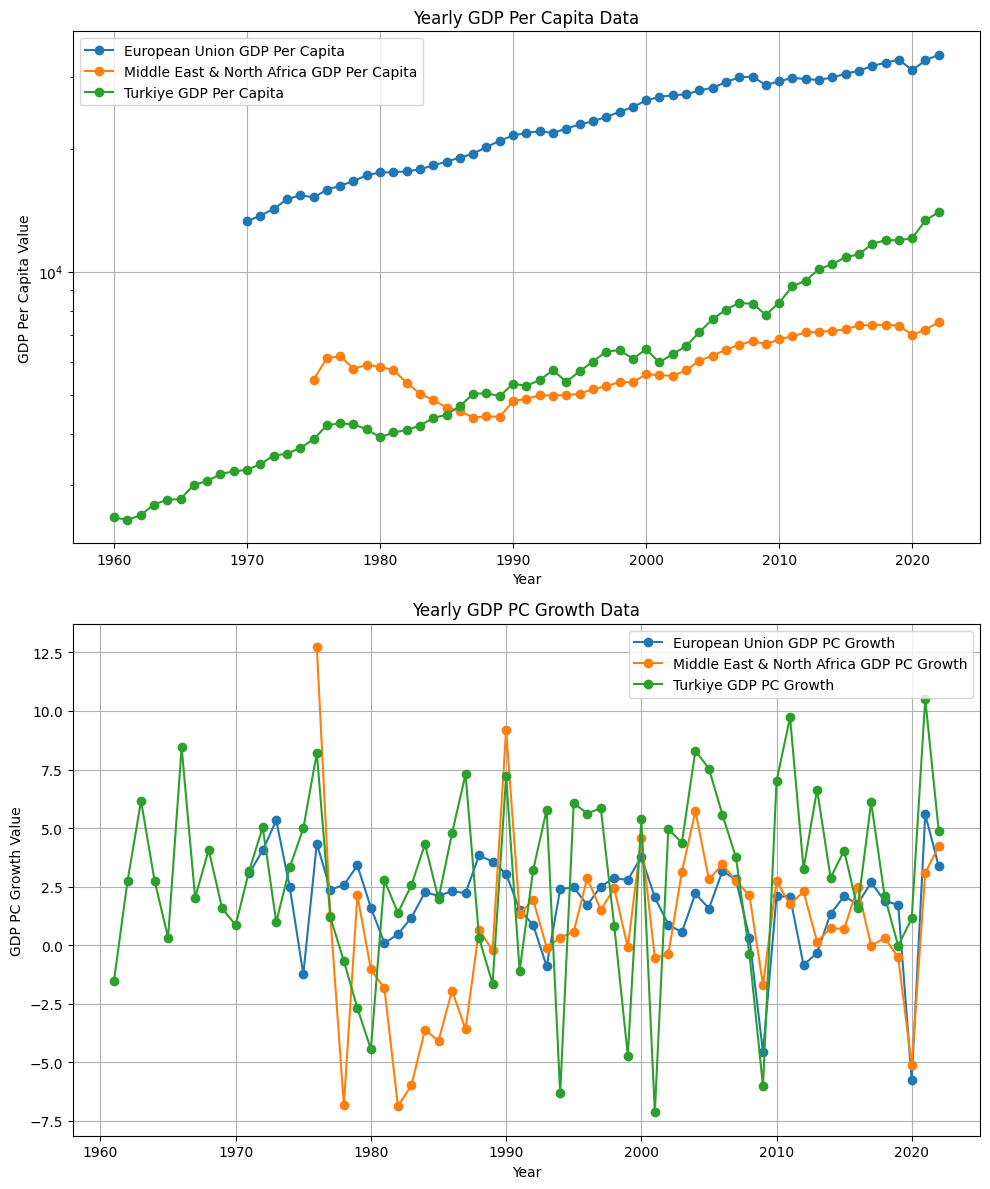

In [2]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="country_economics",
    user="postgres",
    password="3204965",
    host="localhost",
    port="5432"
)

# Create a cursor
cur = conn.cursor()

# Construct the list of year columns dynamically
year_columns = ",\n".join([f"year_{year}" for year in range(1960, 2023)])

# SQL query
sql_query = f"""
    SELECT
        gdp.country_name,
        {year_columns}
    FROM gdp_per_capita AS gdp
    WHERE country_name IN ('Turkiye', 'European Union',
      'Middle East & North Africa');
"""

# Fetch data from the gdp_countries table
cur.execute(sql_query)
gdp_data = cur.fetchall()

# Fetch data from the inflation table
inf_query = f"""
    SELECT
        inf.country_name,
        {year_columns}
    FROM gdp_per_capita_growth AS inf
    WHERE country_name IN ('Turkiye', 'European Union',
      'Middle East & North Africa');
"""

cur.execute(inf_query)
inf_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

years = list(range(1960, 2023))
gdp_values = []
gdp_countries = []
inf_values = []
inf_countries = []

for row in gdp_data:
    country_name = row[0]
    gdp_values.append(row[1:])
    gdp_countries.append(country_name)

for row in inf_data:
    country_name = row[0]
    inf_values.append(row[1:])
    inf_countries.append(country_name)

# Create a line plot
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot GDP data in the first subplot
for country, gdp in zip(gdp_countries, gdp_values):
    axes[0].plot(years, gdp, marker='o', label=f"{country} GDP Per Capita")

axes[0].set_title("Yearly GDP Per Capita Data")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP Per Capita Value")
axes[0].set_yscale("log")
axes[0].grid(True)
axes[0].legend()

# Plot inflation data in the second subplot
for country, inf in zip(inf_countries, inf_values):
    axes[1].plot(years, inf, marker='o', label=f"{country} GDP PC Growth")

axes[1].set_title("Yearly GDP PC Growth Data")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP PC Growth Value")
# axes[1].set_yscale("log")
axes[1].grid(True)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Turkey's GDP & Inflation within its Region
When you look at the graphs, you can see the GDP per capita of Turkey and its surrounding regions. Note that the line graph is logarithmic which makes the small differences big for low income and and bi differences small for high income.  
I plot the graph logarithmically to see the trend of GDP per capita of Turkiye more clearly. 

Second graph shows the GDP per capita growth throughout the years from 1961 to 2022. In the graph, while the growth rate of Turkey and Middle East area changes dramatically, European Union's growth change is relatively stable. Besides, EU's GDP per capita growth trend becomes negative through the years much less when it is compared with Turkiye and MENA. 

_Note: Different recources provide changeable values for GPD per capita of Turkiye especially for the last years._

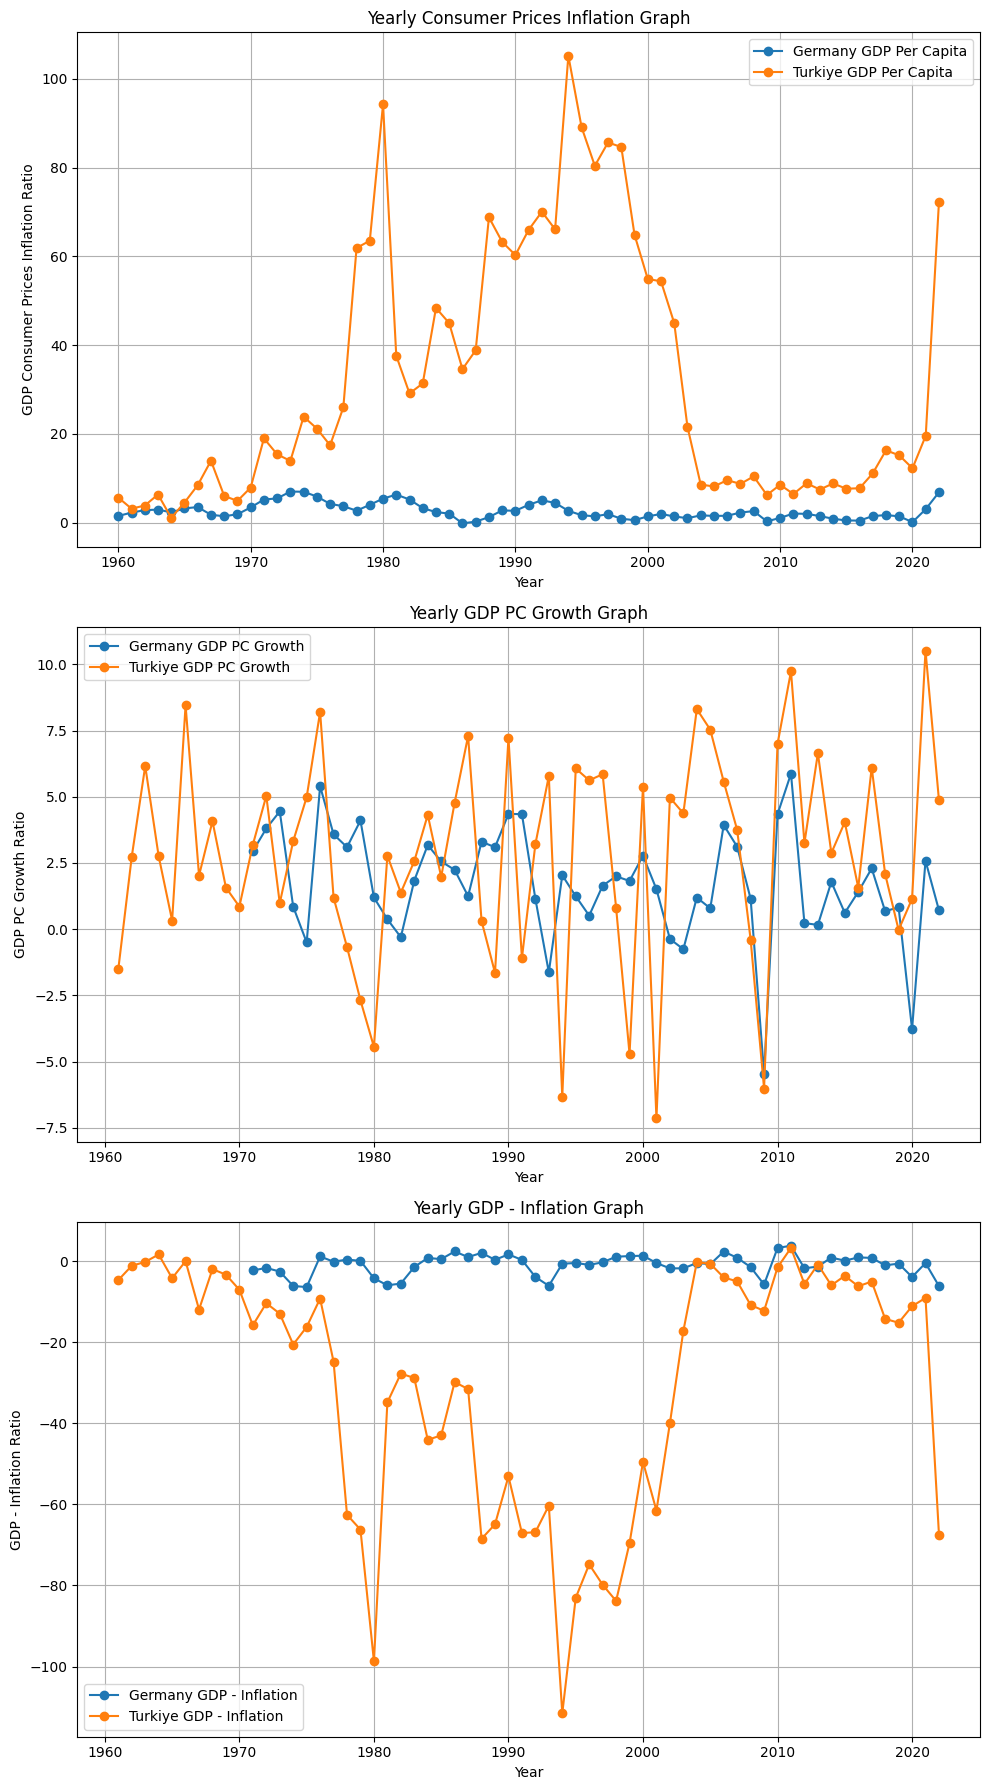

In [3]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="country_economics",
    user="postgres",
    password="3204965",
    host="localhost",
    port="5432"
)

# Create a cursor
cur = conn.cursor()

# Construct the list of year columns dynamically
year_columns = ",\n".join([f"year_{year}" for year in range(1960, 2023)])

# SQL query
sql_query = f"""
    SELECT
        gdp.country_name,
        {year_columns}
    FROM inflation_consumer AS gdp
    WHERE country_name IN ('Turkiye', 'Germany');
"""

# Fetch data from the gdp_countries table
cur.execute(sql_query)
gdp_data = cur.fetchall()

# Fetch data from the inflation table
inf_query = f"""
    SELECT
        inf.country_name,
        {year_columns}
    FROM gdp_per_capita_growth AS inf
    WHERE country_name IN ('Turkiye', 'Germany');
"""
#, 'European Union',
    #  'Middle East & North Africa'

cur.execute(inf_query)
inf_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

years = list(range(1960, 2023))
gdp_values = []
gdp_countries = []
inf_values = []
inf_countries = []

for row in gdp_data:
    country_name = row[0]
    gdp_values.append(row[1:])
    gdp_countries.append(country_name)

for row in inf_data:
    country_name = row[0]
    inf_values.append(row[1:])
    inf_countries.append(country_name)

# Calculate the difference between GDP and inflation
diff_values = []

for gdp_row, inf_row in zip(gdp_values, inf_values):
    diff_row = []
    for gdp, inf in zip(gdp_row, inf_row):
        if gdp is not None and inf is not None:
            diff_row.append(inf - gdp)
        else:
            diff_row.append(None)
    diff_values.append(diff_row)


# Create a line plot
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot GDP data in the first subplot
for country, gdp in zip(gdp_countries, gdp_values):
    axes[0].plot(years, gdp, marker='o', label=f"{country} GDP Per Capita")

axes[0].set_title("Yearly Consumer Prices Inflation Graph")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP Consumer Prices Inflation Ratio")
# axes[0].set_yscale("log")
axes[0].grid(True)
axes[0].legend()

# Plot inflation data in the second subplot
for country, inf in zip(inf_countries, inf_values):
    axes[1].plot(years, inf, marker='o', label=f"{country} GDP PC Growth")

axes[1].set_title("Yearly GDP PC Growth Graph")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP PC Growth Ratio")
# axes[1].set_yscale("log")
axes[1].grid(True)
axes[1].legend()

for country, diff in zip(gdp_countries, diff_values):
    axes[2].plot(years, diff, marker='o', label=f"{country} GDP - Inflation")

    
axes[2].set_title("Yearly GDP - Inflation Graph")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("GDP - Inflation Ratio")
axes[2].grid(True)
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

### GDP - Inflation Ratio
